# Analyze Clusters

xxx

### Data Sources

Profile type data with clusters appended, as prepared in notebook 4: `profile_type_w_clusters.csv`

### Changes

- 2019-01-29: Started notebook


In [1]:
# load libraries

import numpy as np
import pandas as pd
from tqdm import tqdm

# my own custom functions
import EDA_functions as EDA
import cleaning_functions as cleaning

# visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('white')
color = 'rebeccapurple'
%matplotlib inline

# display settings
from IPython.display import display
pd.options.display.max_columns = None

from pathlib import Path  # to make file path references relative to notebook directory

In [2]:
# import preparated data

profile_clusters_file = Path.cwd() / "data" / "processed" / "profile_type_w_clusters.csv"
profile_clusters = pd.read_csv(profile_clusters_file, index_col = 0, dtype={'gender' : 'category'})

In [3]:
display(profile_clusters.head())
display(profile_clusters.info())

,age,gender,income,member_days,offer_received,offer_viewed,offer_completed,viewed_received,completed_viewed,total_trans,total_amount,total_reward,total_profit,prop_reward,total_mean_amount,np_trans,np_amount,np_mean_amount,prop_np_trans,prop_np_amount,bogo_completed,bogo_viewed,bogo_trans,bogo_amount,discount_completed,discount_viewed,discount_trans,discount_amount,info_viewed,info_trans,info_amount,prop_bogo_amount,prop_discount_amount,prop_info_amount,bogo_vtc,discount_vtc,prop_bogo_viewed,prop_discount_viewed,prop_info_viewed,prop_by_accident,view_to_complete,cluster
p_1,NaN,NaN,NaN,-529,5.0,5.0,2.0,1.00,2.0,9.0,20.40,5.0,15.40,0.245098,2.266667,0,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000,2.0,5.0,9.0,20.400,0.0,0.0,0.000,0.000000,1.000000,0.000000,0.0,0.4,0.000000,1.000000,0.000000,0.00,0.4,4.0
p_10,NaN,NaN,NaN,-611,4.0,3.0,1.0,0.75,0.0,6.0,15.62,5.0,10.62,0.320102,2.603333,3,7.69,2.563333,0.500000,0.492318,0.0,2.0,3.0,7.930,0.0,0.0,0.0,0.000,1.0,0.0,0.000,0.507682,0.000000,0.000000,0.0,0.0,0.666667,0.000000,0.333333,0.25,0.0,11.0
p_100,68.0,F,84000.0,-725,5.0,0.0,1.0,0.00,0.0,2.0,34.04,2.0,32.04,0.058754,17.020000,2,34.04,17.020000,1.000000,1.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.20,0.0,7.0
p_1000,67.0,M,44000.0,-225,4.0,4.0,0.0,1.00,0.0,5.0,19.78,0.0,19.78,0.000000,3.956000,2,13.37,6.685000,0.400000,0.675935,0.0,3.0,3.0,5.555,0.0,0.0,0.0,0.000,1.0,1.0,0.855,0.280839,0.000000,0.043225,0.0,0.0,0.750000,0.000000,0.250000,0.00,0.0,11.0
p_10000,NaN,NaN,NaN,-446,3.0,3.0,0.0,1.00,0.0,6.0,7.28,0.0,7.28,0.000000,1.213333,1,1.83,1.830000,0.166667,0.251374,0.0,2.0,4.0,3.935,0.0,1.0,3.0,1.515,0.0,0.0,0.000,0.540522,0.208104,0.000000,0.0,0.0,0.666667,0.333333,0.000000,0.00,0.0,10.0


<class 'pandas.core.frame.DataFrame'>
Index: 17000 entries, p_1 to p_9999
Data columns (total 42 columns):
age                     14825 non-null float64
gender                  14825 non-null category
income                  14825 non-null float64
member_days             17000 non-null int64
offer_received          17000 non-null float64
offer_viewed            17000 non-null float64
offer_completed         17000 non-null float64
viewed_received         17000 non-null float64
completed_viewed        17000 non-null float64
total_trans             17000 non-null float64
total_amount            17000 non-null float64
total_reward            17000 non-null float64
total_profit            17000 non-null float64
prop_reward             17000 non-null float64
total_mean_amount       17000 non-null float64
np_trans                17000 non-null int64
np_amount               17000 non-null float64
np_mean_amount          17000 non-null float64
prop_np_trans           17000 non-null float64
pro

None

## Aggregate and Analyze Cluster Manifestations

In [4]:
"""create aggregated dataframe with mean values, overall and per cluster"""

# re-arange cols for better analysis
cols = ['age', 'gender', 'income', 'member_days', 'offer_received',
        'offer_viewed', 'viewed_received', 'prop_bogo_viewed', 'prop_discount_viewed', 
        'prop_info_viewed', 'offer_completed', 'completed_viewed', 'view_to_complete', 
        'prop_by_accident', 'total_trans', 'total_amount', 'total_reward', 
        'total_profit', 'prop_reward', 'total_mean_amount', 'np_trans',
        'np_amount', 'np_mean_amount', 'prop_np_trans', 'prop_np_amount',
        'prop_bogo_amount', 'prop_discount_amount', 'prop_info_amount', 
        'bogo_vtc', 'discount_vtc', 'bogo_completed', 'bogo_viewed', 
        'bogo_trans', 'bogo_amount', 'discount_completed', 'discount_viewed', 
        'discount_trans', 'discount_amount', 'info_viewed', 'info_trans', 
        'info_amount', 'cluster']

assert len(cols) == len(profile_clusters.columns)  # safety-check
profile_clusters = profile_clusters.reindex(columns=cols)

# drop cols that do not help during analysis (iteratively)
profile_clusters.drop(['completed_viewed', 'np_trans', 
                      'np_amount', 'np_mean_amount',
                      'prop_np_trans'], axis=1, inplace=True)

profile_grouped = profile_clusters.groupby(['cluster'])
clusters_mean = pd.DataFrame(profile_grouped.mean())

# add a first row with overall mean values
overall_mean = pd.DataFrame(profile_clusters.mean()).T.set_index('cluster')
clusters_mean = pd.concat([overall_mean, clusters_mean], axis=0)

# some index cosmetics - cluster 0 stands for overall mean values
clusters_mean.reset_index(inplace=True)
clusters_mean['cluster'] = list(range(0,13,1))
clusters_mean.set_index('cluster', inplace=True)

# check results
display(clusters_mean)

,age,income,member_days,offer_received,offer_viewed,viewed_received,prop_bogo_viewed,prop_discount_viewed,prop_info_viewed,offer_completed,view_to_complete,prop_by_accident,total_trans,total_amount,total_reward,total_profit,prop_reward,total_mean_amount,prop_np_amount,prop_bogo_amount,prop_discount_amount,prop_info_amount,bogo_vtc,discount_vtc,bogo_completed,bogo_viewed,bogo_trans,bogo_amount,discount_completed,discount_viewed,discount_trans,discount_amount,info_viewed,info_trans,info_amount
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,54.393524,65404.991568,-517.449882,4.486882,3.395588,0.760115,0.436760,0.362423,0.163990,1.975235,0.478131,0.133522,8.173706,104.438351,9.561882,94.876469,0.101974,13.340673,0.491477,0.213431,0.209033,0.061236,0.347604,0.433754,0.636588,1.482706,1.933765,18.998093,0.730294,1.256588,1.769412,19.467890,0.575412,0.572529,6.882315
1,56.596161,70713.670192,-614.695253,4.641271,3.818913,0.833053,0.514893,0.462615,0.008799,3.813170,0.817592,0.172333,10.475115,182.597749,19.290199,163.307550,0.144528,19.383859,0.523587,0.242095,0.233876,0.000441,0.815493,0.884992,1.498469,1.970138,2.433002,40.151155,1.475498,1.752680,2.400842,38.089978,0.042496,0.009571,0.094766
2,51.937644,58655.889145,-338.998445,4.362364,3.133748,0.732919,0.087610,0.530767,0.345905,0.353033,0.003370,0.079964,4.992224,36.059565,1.390358,34.669207,0.027624,7.867543,0.547322,0.002446,0.327245,0.122987,0.000000,0.006998,0.000000,0.356143,0.063764,0.038103,0.007776,1.561431,1.852255,7.489487,1.115086,0.819596,5.188103
3,54.833792,69915.518825,-599.329806,4.165785,2.705467,0.666299,0.923912,0.004233,0.026749,2.649030,0.736258,0.216652,8.708113,136.752593,17.756614,118.995979,0.182419,17.973431,0.584470,0.413503,0.000000,0.002027,0.739345,0.000000,1.705467,2.463845,3.369489,48.577368,0.000000,0.019400,0.000000,0.000000,0.100529,0.040564,0.485004
4,55.791710,68765.803109,-584.384241,4.086576,2.596304,0.647925,0.021255,0.903356,0.025292,2.535992,0.792445,0.188343,8.731518,126.905661,7.860895,119.044767,0.099226,16.580487,0.543430,0.000087,0.452772,0.003712,0.000000,0.813667,0.000000,0.089494,0.008755,0.008750,1.731518,2.269455,3.422179,50.681503,0.105058,0.055447,0.626712
5,54.636010,67433.937824,-501.391153,4.668219,3.785797,0.819461,0.553764,0.337718,0.089309,2.488941,0.429589,0.234497,8.543655,126.747206,14.350407,112.396799,0.183221,16.814621,0.450071,0.373804,0.148416,0.027709,0.703066,0.047148,1.345751,2.110594,2.818393,38.849942,0.047730,1.211874,1.869616,19.308120,0.387660,0.385332,4.415990
6,53.426000,62488.000000,-534.027284,4.361210,3.058719,0.710647,0.716963,0.022272,0.231089,1.361210,0.433768,0.115589,7.733689,86.305237,8.890866,77.414371,0.103519,11.587032,0.487752,0.410028,0.000077,0.102143,0.453203,0.000000,0.848161,2.069395,3.051008,24.212619,0.000000,0.092527,0.006524,0.003206,0.806050,0.937129,13.549792
7,55.266556,64241.721854,-439.848189,3.736769,1.919220,0.508426,0.130710,0.051300,0.511746,0.473538,0.000000,0.132660,4.811978,57.230557,2.189415,55.041142,0.036529,13.057516,0.814009,0.004850,0.001150,0.179991,0.000000,0.000000,0.000000,0.431755,0.062674,0.074436,0.000000,0.203343,0.036212,0.034666,1.104457,1.011142,11.326706
8,53.959817,65776.255708,-522.378862,4.325203,3.248780,0.762168,0.036301,0.603266,0.334675,1.666667,0.641978,0.110407,7.875610,99.960764,5.071545,94.889220,0.068601,13.770611,0.479425,0.000355,0.389439,0.130781,0.000000,0.682222,0.000000,0.154472,0.021138,0.015675,1.175610,1.875610,2.694309,26.620226,1.130894,1.264228,16.862221


**Findings:**

Biggest segements, both with same amount bogo and disc - differ mainly in bogo acceptance

- Seg 1 (n=2612 / 15.4%): high viewrate (in both largest segments btw), bogo == disc / no info, 0.8 vtc, most profitable / highest spending, rel. high prop reward, np slight above avg, discount vtc 0.9 / bogo vtc 0.8 --> ALL GOOD

- Seg 9 (n=2375 / 14.0%): high received, high viewrate, 0.5 vtc, high profit, low prop_np / acc, bogo == disc, some info, spent higher on discount (trans ==), completed more discount discount vtc 0.9 / bogo vtc 0.6 --> DROP IN BOGO vs. DISC

- Seg 12 (n=1435 / 8.4%): high vr, 35b / 50d / 15i, below avg vtc, below avg spenders, lowest np_amount, high prop d amount, bogo vtc <1!!, discount vtc 0.8, DO NOT LIKE BOGOS at all!

- Seg 5 (n=859 / 5.7%) 50 bogo / 30 disc / 10 info, high vr, mediocre vtc, highest by accident (trotz high vr ...), bigger spenders, bogo vtc 0.7, discount vtc 0.05 (!) - DONT SEEM TO LIKE DISCOUNTS AT ALL

Smallest segments, both with similar high amount info / disc - low spenders

- Seg 7 (n=718 / 4.2%): 15b / 5d / 50i, low offer received, lowest viewrate by far, FEWEST transactions BUT MEAN SPENDING is AVG, no completions of viewed offers (only by accident), 50% of offers were info, prop info amount 17%, is high, but generally they are low in amount --> INFO ALONE DOES NOT HELP --> treat better

Two midsize segments, one bogo only, one disc only - shows that disc performs a little better and profitability is higher!

- Seg 3 (n=1134 / 6.7%) BOGO only, rather low vr, , good overall, vtc 0.7 (same as bogo vtc), high by acc, highest reward share, big spenders, high np-share, --> no promo hunters, but bogo works quite well

- Seg 4 (n=1028 / 6.0%) DISC only low received, low vr (seem correlated), vtc 0.8 (overall, disc), spend (only) a little less than Seg 3 but more profitable due to lower rewards, also above avg np prop --> no promo hunters, but discount works quite well

- Seg 6 (n=1687 / 9.9%): BOGO high and some info (no disc), vr below avg, vtc low (0.4 - all bogo), also no big reaction on info, mediocre spenders, but not as low as other groups - BOGO NOT SO GOOD, maybe potential for discounts?

- Seg 8 (n=1230 / 7.2%): 2/3 disc 1/3 info (higest info rate of all), avg vtr rate, vtc mediocre for disc (0.68), info does have an effect, but its generally small compared to other offers (13% prop amount), avg spenders - DISC OK



LOW PROFIT, NO EFFECT

- Seg 11 (n=961 / 5.7%): 2/3 bogo 1/3 info, lower vtr rate, lowest vtc rate of all!!!, low spenders (a little higher than seg 2), high prop np amount, spend a little during bogo but low, do not complete --> LOW PROFIT; BOGO NO EFFECT

- Seg 2 (n=643 / 3.8%): 10b / 50d/ 40i , vtc near zero, don't react on discount, very low spending, seem to spend under discount but not enough to complete --> LOW, DISCOUNT AND INFO NO EFFECT 

- Seg 10 (n=1471 / 8.7%): 50b / 40d / 10i, good vtr, vtc 1%!!!, very low spenders, small transactions, also lowest np_amount, but not sure if offers have to do with that, maybe minimal effect - anyway they don't cost much ... LOW PROFIT, OFFERS NO EFFECT






Genral findings

- viewrate correlated with number of offers received, inter-segment diff not too big probably 
- info does have an effect, but its generally small compared to other offers (has a notable neg correlation to total profit), 
    - but also a positive correlation to prop np amount (but that doesnt help)
    - info seems to be shown to younger / older members? notable correlation to member_days)


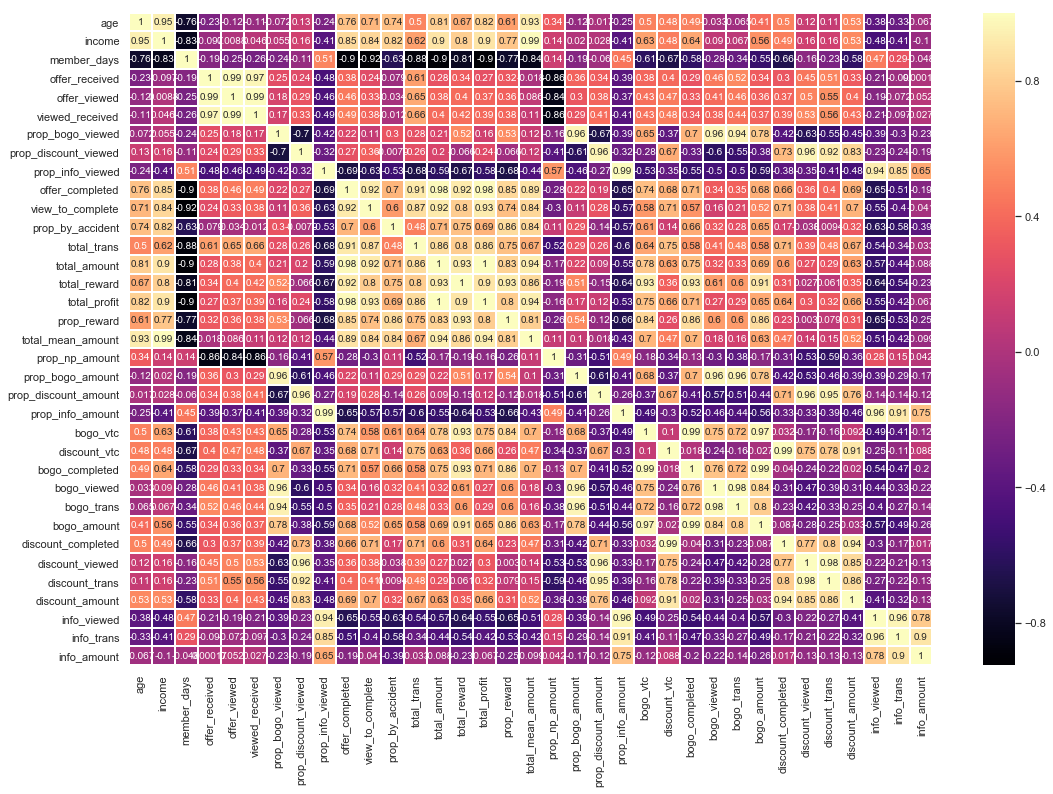

In [5]:
"""show correlation between features"""

EDA.plot_num_corrMap(clusters_mean, figsize=(18, 12))

In [6]:
round(profile_clusters['cluster'].value_counts() / len(profile_clusters),3)

1.0     0.154
9.0     0.140
6.0     0.099
10.0    0.087
12.0    0.084
8.0     0.072
3.0     0.067
4.0     0.060
11.0    0.057
5.0     0.051
7.0     0.042
2.0     0.038
Name: cluster, dtype: float64

## Explore Demographic Features for Different Segments

Segments 5 and 12 are the most interesting for a direct comparision. In Segment 5 we have abov average spenders who react on BOGOs but absolutely not on discounts. In Segment 12 we have people spending somewhat below average, who react on discounts but absolutely not on BOGOs.

In [7]:
"""create dataframe containing segments of interst only, drop NaN"""

seg_5_12 = profile_clusters.copy().loc[profile_clusters['cluster'].isin([5, 12])]
seg_5_12.dropna(how = 'any', inplace=True)
len(seg_5_12)

1947

In [8]:
seg_5_12.groupby(['cluster']).mean()

,age,income,member_days,offer_received,offer_viewed,viewed_received,prop_bogo_viewed,prop_discount_viewed,prop_info_viewed,offer_completed,view_to_complete,prop_by_accident,total_trans,total_amount,total_reward,total_profit,prop_reward,total_mean_amount,prop_np_amount,prop_bogo_amount,prop_discount_amount,prop_info_amount,bogo_vtc,discount_vtc,bogo_completed,bogo_viewed,bogo_trans,bogo_amount,discount_completed,discount_viewed,discount_trans,discount_amount,info_viewed,info_trans,info_amount
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5.0,54.636010,67433.937824,-493.689119,4.660622,3.756477,0.814853,0.552979,0.333355,0.093048,2.638601,0.445639,0.256736,8.470207,137.733251,15.278497,122.454754,0.175753,18.299932,0.474163,0.353493,0.144039,0.028305,0.720984,0.052461,1.388601,2.089378,2.645078,41.329788,0.053109,1.183938,1.752591,20.972563,0.401554,0.393782,4.838439
12.0,53.411915,62271.489362,-542.074043,4.708936,3.685106,0.794099,0.355702,0.500468,0.125532,2.213617,0.466199,0.163943,9.406809,96.264323,7.722553,88.541770,0.111472,12.815509,0.464565,0.106284,0.383561,0.045590,0.005106,0.827404,0.005957,1.268085,1.651915,7.640430,1.419574,1.846809,3.075745,31.462857,0.502128,0.611915,5.325990


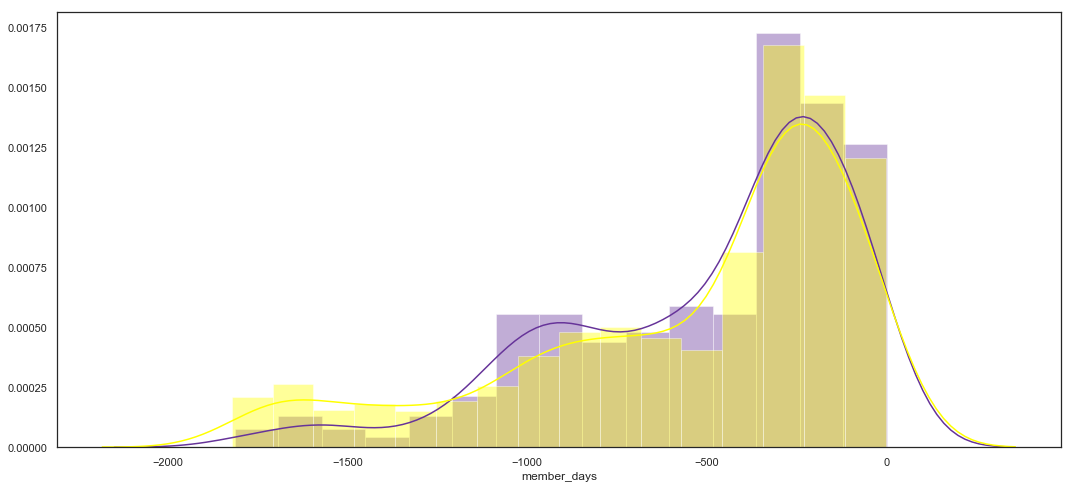

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.distplot(seg_5_12.loc[seg_5_12['cluster'] == 5]['prop_bogo_amount'], color=color)
sns.distplot(seg_5_12.loc[seg_5_12['cluster'] == 12]['prop_bogo_amount'], color='yellow')
plt.subplot(1,2,2)
sns.distplot(seg_5_12.loc[seg_5_12['cluster'] == 5]['prop_bogo_amount'], color=color)
sns.distplot(seg_5_12.loc[seg_5_12['cluster'] == 12]['prop_bogo_amount'], color='yellow')

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.scatterplot(x='income', y='age', hue='gender', data=seg_5_12.loc[seg_5_12['cluster'] == 5], palette='Set1')
plt.subplot(1,2,2)
sns.scatterplot(x='income', y='age', hue='gender', data=seg_5_12.loc[seg_5_12['cluster'] == 12], palette='Set1')

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.scatterplot(x='income', y='member_days', hue='gender', data=seg_5_12.loc[seg_5_12['cluster'] == 5], palette='Set1')
plt.subplot(1,2,2)
sns.scatterplot(x='income', y='member_days', hue='gender', data=seg_5_12.loc[seg_5_12['cluster'] == 12], palette='Set1')

In [ ]:
- do numerize gender
- do rename profit